In [131]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import os
import scipy.io
import pdb
from glob import glob

In [132]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [203]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(15, 8)

## Toy Dataset

To specify a weight hyperparameter value (eg. lambda=1.0) for cycle-consistency regularizer, runs like

```
python alice_toy.py --lambda 1.0
```

The result will be saved in a *.mat file, read the file like:
```
R = scipy.io.loadmat('2noise_ali_0_1.mat')
icp = R['icp'][0,:]
mse = R['mse'][:,0,0]
```   

In [123]:
# Style
figsize(10, 5)
plt.rc('text', usetex=True)

# Create directory to save figs
fig_dir = 'figures/'
directory = fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)

In [124]:
def plot_hyperpara_ff(dat, logx=False, ylabel_name=None, c=(.7,.7,1), saveas=None, metric=None, pperf=None):
    plotfn = semilogx if logx else plot
    
    x, y, yerr = dat[:,0], dat[:,1], dat[:,2]
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr 
        

    plotfn(x, y,'o-', lw=2, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    fill_between(x, ymax, ymin, alpha=0.2, color=(.7,.7,1))             
            
    if metric=='icp':
        idx = np.argmax(y, axis=0)
        if pperf:
            axhline(pperf, color=(.7,.7,.7), ls='-', label='true samples')
        plotfn(x[idx], y[idx], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)

    elif metric=='mse':
        idx = np.argmin(y, axis=0)
        if pperf:
            axhline(pperf, color=(.7,.7,.7), ls='-', label='denoising auto-encoders')
        plotfn(x[idx], y[idx], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    axhline(y[0], color=(.7,.7,.7), ls='--', label='ALI (w/o CE regularizer)')


    legend()
    xlabel('Weighting hyperparameter')
    if ylabel_name:
        ylabel(ylabel_name)
    plt.tight_layout()    

    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

In [82]:
dat_toy_ali = array([
    [4.97051, 4.07911157608],[3.97986, 5.08360862732],[1.00001, 3.2225124836],[4.88078, 6.25963449478],[3.65552, 5.47807598114],[1.99106, 4.25255298615],[1.00238, 2.71198272705],[4.7548, 5.06562995911],[3.95075, 6.40726900101],[1.0003, 5.56619977951],[3.7896, 6.3109703064],[4.91474, 6.39080381393],[2.92511, 5.7673459053],[1.48181, 2.52675223351],[1.99445, 7.12504196167],[1.98885, 3.63469362259],[1.99159, 4.48922157288],[3.8702, 3.95899200439],[4.90755, 3.42820215225],[2.93556, 5.93338871002],[2.96732, 2.70947551727],[1.99002, 2.58720541],[2.26631, 9.202044487],[1.99526, 3.72539901733],[1.00001, 6.40787887573],[1.00001, 8.14189720154],[1.00002, 3.31854152679],[3.85498, 2.31136369705],[1.00003, 3.2206196785],[4.83823, 4.78403139114],[2.98278, 5.58848142624],[3.93142, 5.3848285675],[1.00006, 3.25654983521],[4.84386, 3.67101716995],[4.64248, 5.00981521606],[3.90571, 4.68713331223],[1.00002, 3.02960419655],[4.9133, 5.63757991791],[1.02756, 6.53717756271],[1.99618, 4.32610321045],[1.98976, 2.81428337097],[2.04387, 2.00505852699],[2.98102, 5.3882894516],[3.94114, 3.9438624382],[2.4095, 4.9751701355],[0.999995, 7.28145503998],[4.89633, 4.21509790421],[4.11639, 6.60431861877],[4.8438, 5.89116239548],[4.36517, 6.17787456512],[4.00322, 7.110663414],[3.73372, 3.16338086128],[2.32728, 7.23013401031],[3.94701, 3.29042696953],[1.00002, 6.29350996017],[4.95015, 4.65011405945],[2.07254, 2.95656871796],[4.83915, 5.91632938385],[4.88627, 5.16103363037],[0.999997, 3.32765483856],[4.96144, 7.68947839737],[1.00003, 2.57388615608],[4.95166, 4.36495399475],[1.00002, 2.98563861847],[1.983, 4.74464941025],[1.97217, 3.60527944565],[1.00004, 3.01941108704],[1.98006, 2.94733953476],[1.97864, 5.8324213028],[2.98052, 6.982837677],[1.00008, 3.35223221779],[1.00002, 2.92819738388],[2.95375, 10.0],[2.88, 3.5803873539],[1.98517, 2.63706111908],[2.94079, 3.57127952576],[1.99495, 3.7458615303],[2.93355, 3.81901597977],[1.99028, 3.73834848404],[1.99635, 3.65444540977],[1.9937, 2.84956789017],[1.96572, 2.85770273209],[1.00001, 3.10866904259],[1.0005, 8.49259567261],[4.69397, 4.4926776886],[3.94461, 5.8611125946],[1.00002, 3.27697372437],[1.00003, 3.31775903702],[1.00009, 3.47038507462],[1.00005, 3.16616225243],[1.00001, 5.84628391266],[4.89577, 6.66153812408],[1.00002, 5.80775356293],[2.96331, 5.34096717834],[3.99011, 4.81297636032],[1.00005, 5.4756155014],[1.00003, 3.03162527084],[3.95817, 4.6801905632],[3.7168, 6.58216762543],[1.00003, 6.08480358124],[4.85184, 3.96207523346],[1.9924, 3.15072846413],[1.99311, 3.36284160614],[1.0, 3.25599837303],[1.99618, 3.76593017578],[4.98117, 5.76833820343],[1.99899, 3.69685649872],[2.1554, 10.0],[1.35656, 10.0],[1.01625, 2.36206197739],[1.00014, 3.03702640533],[1.00001, 2.27196788788],[1.00257, 6.10613155365],[2.98566, 5.74531173706],[4.56907, 3.56092905998],[3.8671, 4.75068950653],[4.95403, 4.94701957703],[4.63139, 4.2628903389],[1.99081, 6.59411430359],[1.00063, 2.61962461472],[2.98476, 3.74303817749],[4.96071, 3.46277785301],[4.76408, 5.52686166763],[2.97129, 3.30799722672],[3.58025, 2.15444111824],[2.97115, 4.46955013275],[0.999994, 3.31627130508],[1.95577, 3.17000484467],[4.22165, 5.40691375732],[1.87691, 2.87753295898],[1.97183, 6.14656829834],[1.02681, 2.87133216858],[4.93773, 5.41787338257],[1.99539, 3.44041371346],[3.956, 3.6386244297],[1.95303, 2.64189291],[4.92261, 2.64291906357],[1.69977, 2.82730197906],[4.88934, 4.18474245071],[4.8648, 4.64468193054],[2.98384, 3.7319726944],[1.0, 6.20244503021],[1.00001, 8.43689155579],[4.72854, 5.66473960876],[1.0, 3.33286714554],[0.999997, 10.0],[4.90586, 3.75184249878],[1.00006, 2.22335672379],[2.06417, 9.12124061584],[4.93417, 6.07120943069],[1.98099, 4.52580451965],[3.95094, 2.95302581787],[2.92574, 7.25335597992],[1.61623, 6.39782428741],[4.87136, 4.41006278992],[2.96291, 5.57111024857],[1.46711, 4.17909383774],[4.70442, 4.57672977448],[1.00001, 7.16042900085],[1.99194, 3.46289396286],[1.00674, 3.48422288895],[1.17921, 9.62603569031],[4.73516, 6.62903594971],[1.99153, 4.83599615097],[1.00001, 3.32123565674],[3.97, 4.13889789581],[1.99946, 3.74891614914],[1.00004, 3.24113583565],[1.00002, 2.8306722641],[1.99325, 1.93774938583],[3.94846, 4.15286159515],[4.78182, 3.38440513611],[1.316, 10.0],[4.83259, 4.00205516815],[3.27216, 4.08665561676],[1.517, 4.1186170578],[1.00005, 3.1878991127],[1.99267, 2.81990027428],[3.91846, 6.67791080475],[2.96099, 2.70167684555],[3.92485, 5.01280975342],[3.82975, 5.40978145599],[4.7637, 6.28861904144],[1.00002, 3.29050397873],[2.97607, 4.85339975357],[1.00003, 2.05824875832],[1.99638, 3.68021988869],[0.999997, 6.6073102951],[0.999995, 7.09934902191],[2.95299, 5.07140159607],[0.999998, 7.76440620422],[1.99062, 4.52143955231],[4.901, 4.55056524277],[3.95511, 4.13753318787],[4.91154, 3.94773483276],[1.99071, 2.55700039864],[2.94846, 3.82827234268],[4.89469, 5.16819429398],[2.99203, 4.36494922638],[1.09139, 2.26344537735],[4.84554, 3.95169663429],[1.00001, 2.95476436615],[1.95302, 3.29078006744],[1.00037, 2.89617800713],[0.999999, 6.46888589859],[1.00001, 2.73764419556],[2.95928, 8.35000228882],[2.17167, 7.32603931427],[1.00006, 3.02740502357],[3.56973, 4.92328548431],[0.999995, 3.22142672539],[4.2272, 6.2671456337],[2.99206, 3.4116230011],[4.89899, 6.37960767746],[3.96412, 6.11306333542],[4.86724, 6.14713525772],[4.88807, 5.49304676056],[4.94725, 6.39765548706],[1.04093, 7.21297454834],[1.00007, 6.53592300415],[1.99594, 3.21056485176],[1.99746, 2.64329266548],[1.98329, 4.20670223236],[1.0, 6.46690559387],[1.47337, 3.93229389191],[0.999998, 6.50602149963],[3.94368, 2.86305952072],[1.00001, 3.24348068237],[1.97849, 2.26882910728],[1.00009, 6.51320743561],[4.77783, 4.03861093521],[1.00001, 3.21278166771],[4.66019, 3.0690870285],[3.96874, 10.0],[4.86487, 6.66848468781],[1.02143, 6.33085727692],[1.00014, 6.04144001007],[3.97257, 6.35239982605],[4.92234, 4.97697639465],[4.93948, 2.46328020096],[4.92931, 6.28315877914],[1.00583, 3.16681599617],[3.21459, 6.12675237656],[1.4561, 2.46909427643],[1.00001, 8.34111309052],[4.67715, 6.75863265991],[1.98445, 2.649518013],[0.999992, 6.69009256363],[1.00831, 3.36878657341],[4.94722, 6.57863616943],[1.09366, 2.64076757431],[1.3682, 2.85756111145],[2.98253, 4.094871521],[1.98704, 3.2242898941],[4.90866, 6.08942985535],[2.98652, 3.7292599678],[2.98362, 3.94971728325],[4.88944, 4.85855865479],[3.92921, 3.76301956177],[4.80271, 4.96187591553],[4.05169, 4.48251247406],[1.98027, 3.08935976028],[1.99478, 4.1771478653],[1.99731, 3.82094693184],[4.18257, 4.33849048615],[1.00138, 5.61086273193],[1.04504, 2.86002969742],[1.99261, 6.00472593307],[1.00001, 3.26945638657],[1.98994, 2.84198474884],[1.00775, 2.77826833725],[3.82211, 4.42623710632],[1.0112, 6.09168243408],[4.8293, 5.41593837738],[4.92681, 6.70930624008],[4.92228, 3.66696834564],[1.001, 3.49773335457],[0.999999, 3.36294364929],[4.93284, 4.55282211304],[1.99136, 2.77766084671],[4.89109, 4.90272474289],[1.00001, 3.31426334381],[2.94023, 4.62412834167],[4.93339, 3.89917612076],[0.999995, 6.79659938812],[1.98523, 3.22973489761],[4.05239, 6.79898738861],[1.99164, 2.65414142609],[1.04196, 5.3069190979],[2.12619, 3.12971591949],[2.98636, 3.51123166084],[1.23185, 2.46340513229],[4.72306, 4.68920660019],[2.97621, 4.80614471436],[1.93767, 2.75855541229],[1.00005, 6.87440633774],[4.79005, 7.00758075714],[1.00002, 2.87305736542],[3.75076, 3.5768122673],[4.89673, 5.61533737183],[2.16544, 4.05408859253],[4.70873, 2.74738359451],[0.999997, 7.76175689697],[2.98187, 4.31478977203],[1.0, 6.25162744522],[4.83251, 3.44906592369],[2.97348, 5.44187164307],[4.95851, 4.8230266571],[1.98983, 2.56149244308],[1.97496, 3.06336307526],[2.98356, 7.24884605408],[1.99505, 2.6712937355],[1.07986, 6.71936845779],[3.92379, 5.8370308876],[1.00008, 6.29194831848],[2.98109, 3.77292752266],[2.92016, 4.05224227905],[4.32797, 5.93215274811],[1.998, 2.62438440323],[1.07713, 2.55769634247],[1.00008, 7.33860492706],[2.97024, 7.61734485626],[4.94242, 5.37987327576],[4.89054, 5.24024677277],[3.85808, 6.3396859169],[1.0, 3.10664606094],[4.69087, 2.24516487122],[4.94016, 5.87768316269],[1.00012, 3.17974472046],[1.00001, 10.0],[1.00089, 3.18087220192],[1.33731, 10.0],[3.96213, 6.17308998108],[1.98324, 4.42133426666],[1.00003, 3.20771884918],[1.0972, 2.81482458115],[1.00007, 3.62945556641],[1.99046, 2.82088184357],[2.82137, 3.04337143898],[1.98503, 2.29205346107],[2.98267, 5.44735622406],[1.00004, 6.84970664978],[3.92562, 4.46526145935],[1.97876, 4.91025590897],[4.35379, 6.18171548843],[1.00003, 2.99301576614],[3.79925, 3.95861196518],[4.8585, 4.73908376694],[1.97179, 3.66574382782],[0.999999, 3.21781587601],[3.90039, 6.07993459702],[1.00044, 5.78756427765],[4.90981, 3.44551348686],[4.84857, 4.80720758438],[1.9952, 2.27490329742],[1.99411, 3.3527173996],[0.999997, 10.0],[4.62718, 5.23701238632],[1.04105, 2.60682034492],[1.97881, 2.70206451416],[1.99955, 2.95243930817],[4.78181, 3.21690702438],[4.96649, 5.10526657104],[2.98605, 4.45460033417],[2.89595, 7.21241855621],[4.53406, 5.6416182518],[0.999996, 7.33655166626],[3.92484, 5.86306619644],[3.67562, 4.71811962128],[4.85741, 3.02906250954],[4.85059, 3.30204153061],[1.00047, 3.02845001221],[1.98785, 2.37520074844],[0.999995, 6.59720182419],[4.5511, 6.79913711548],[4.78324, 4.73698616028],[1.98247, 2.85562396049],[4.74314, 4.4820356369],[1.99737, 3.73074102402],[3.85616, 3.84076094627],[2.97721, 3.99055027962],[2.9867, 4.06485652924],[0.999997, 7.56942892075],[4.92587, 4.52477455139],[1.99361, 2.67695999146],[4.87695, 6.0144739151],[1.00001, 3.243445158],[4.83614, 6.66002655029],[1.4594, 5.78659248352],[2.95247, 5.08395004272],[4.92481, 3.75733566284],[3.92041, 5.54143762589],[1.00003, 3.13543009758],[2.98387, 10.0],[1.00005, 2.63104486465],[4.97681, 6.87230205536],[4.89578, 3.88135957718],[0.999993, 3.2978105545],[1.00001, 3.25738239288],[1.0, 6.14780330658],[1.53124, 3.56194829941],[4.7717, 5.8566031456],[3.98378, 4.68340587616],[1.00019, 6.80266857147],[2.94586, 4.17471790314],[2.9703, 3.45679450035],[1.0, 6.73644018173],[2.97519, 4.2383184433],[1.00001, 6.59580802917],[0.999998, 7.80817890167],[0.999995, 10.0],[1.71302, 10.0],[1.15012, 3.13346672058],[1.10359, 2.02030086517],[1.0, 3.1538631916],[0.999993, 6.7150645256],[1.98377, 2.74733304977],[4.9421, 5.5202255249],[1.13739, 3.20674610138],[1.03096, 7.13785028458],[0.999996, 10.0],[4.92314, 3.4242310524],[1.9949, 5.9528169632],[1.0016, 3.27883148193],[4.34634, 3.00953531265],[1.00002, 2.83059883118],[1.92536, 5.3118686676],[1.77808, 2.53062105179],[4.90473, 5.99170017242],[2.93921, 3.82218599319],[1.92632, 2.97700929642],[2.97073, 4.78040885925],[4.46212, 4.21359634399],[3.81824, 4.44724082947],[4.84403, 5.14996814728],[4.87187, 5.23500967026],[4.90143, 4.7710313797],[3.59497, 4.80479478836],[1.00003, 5.96030712128],[4.94008, 5.26211357117],[2.98783, 4.64774799347],[4.49563, 5.64038181305],[1.09312, 5.48107337952],[4.97533, 5.86761856079],[4.53586, 4.38337278366],[1.99111, 3.80017495155],[4.89549, 3.39905834198],[3.92485, 3.42006611824],[1.06519, 5.0090265274],[1.98627, 2.85400748253],[4.9666, 3.14972853661],[1.29232, 10.0],[2.92594, 5.57380104065],[4.90359, 2.61951041222],[1.00002, 6.15400266647],[3.96353, 4.49970197678],[3.97063, 5.79542446136],[1.00001, 3.3602437973],[3.83398, 3.07242441177],[2.9227, 3.8326125145],[2.98663, 4.23884010315],[4.92586, 2.92841553688],[1.0004, 2.37606143951],[1.98389, 3.84031057358],[4.91818, 4.44064235687],[2.95323, 4.83535289764],[4.87452, 5.19186687469],[2.98693, 6.12052822113],[3.92085, 4.98066759109],[4.93854, 4.26938486099],[4.92997, 4.76855039597],[1.00045, 6.59295463562],[1.99049, 10.0],[4.77706, 6.64970779419],[4.93744, 4.67423057556],[1.33206, 3.98844957352],[4.33859, 5.71054506302],[2.98985, 5.97069644928],[1.0821, 7.10674190521],[3.80175, 5.11283349991],[2.93828, 3.12320804596],[1.98574, 2.76781630516],[2.95168, 4.4513297081],[1.23133, 10.0],[1.0, 10.0],[2.9714, 3.87954568863],[1.00001, 2.76891803741],[4.69776, 5.81324768066],[4.91702, 5.18905878067],[1.00006, 3.21364736557],[1.98184, 1.95661914349],[4.95012, 5.51098155975],[1.94632, 3.35105705261],[4.81708, 3.38896894455],[3.75144, 5.22891330719],[1.00001, 3.17724084854],[4.93923, 5.79371261597],[2.93484, 5.03954792023],[1.0192, 2.71703839302],[2.96549, 4.75776863098],[1.9936, 2.94412851334],[1.00001, 10.0],[3.96482, 3.97890758514],[1.99473, 3.77954959869],[4.84042, 4.85260772705],[2.34703, 6.21790313721],[1.01618, 7.75253200531],[3.97492, 4.89471340179],[2.96554, 3.66656208038],[1.00061, 2.2877664566],[2.93477, 3.76201295853],[1.98851, 3.60238862038],[2.98265, 4.16309022903],[2.08916, 6.10240983963],[1.9947, 3.21020746231],[3.89359, 4.85514879227],[2.9889, 3.03847026825],[0.999996, 3.39973735809],[1.06156, 2.42272925377],[2.93339, 4.57786464691],[1.99475, 4.42842102051],[4.9022, 3.34789609909],[2.91457, 2.77967214584],[4.63813, 5.91039180756],[1.99849, 3.39158129692],[1.00262, 4.86916780472],[4.90771, 7.27505207062],[2.98358, 4.34693861008],[1.03083, 5.86515140533],[2.97733, 3.9112238884],[1.00133, 3.39366817474],[1.00537, 2.54696965218],[4.19949, 3.6751074791],[4.94925, 6.42470359802],[2.98236, 5.0487575531],[4.92694, 4.80251312256],[4.51539, 5.27767562866],[1.98269, 2.76647019386],[2.96692, 4.43302249908],[4.33643, 6.29438734055],[4.885, 6.3916053772],[1.00014, 5.70572185516],[4.96419, 7.22808647156],[4.84072, 5.88726139069],[1.9823, 4.54725980759],[4.58415, 4.50790023804],[4.63745, 4.00309371948],[2.97909, 3.81080627441],[3.89507, 6.21834182739],[1.00023, 2.74483776093],[4.97286, 5.77345466614],[2.80772, 3.11250567436],[1.99363, 3.2996866703],[1.00002, 2.86013388634],[4.9802, 6.07841491699],[1.99491, 3.86377716064],[4.84231, 5.6193113327],[4.84513, 6.0191411972],[4.87681, 4.21627283096],[2.94702, 5.64024448395],[1.47712, 6.23709821701],[1.00006, 2.91961026192],[1.11626, 8.39208602905],[1.06135, 3.57172203064],[1.99247, 10.0],[4.7265, 3.42920565605],[3.71196, 4.12437057495],[1.00075, 10.0],[2.27863, 6.89530134201],[1.93574, 3.05968618393],[1.00004, 9.91946315765],[1.4758, 2.29317855835],[1.01587, 3.49438381195],[2.9828, 3.11460733414],[1.00016, 2.13292217255],[1.99296, 2.65382003784]
])

dat_toy_alice_001 = array([
    [4.90258, 0.155992],[4.6624, 0.564451],[4.96532, 0.277412],[4.95972, 2.64845],[2.99899, 1.86892],[1.9893, 2.05745],[1.97916, 1.72557],[4.61336, 2.39639],[4.92411, 3.38936],[4.94729, 0.0103896],[2.97908, 2.27871],[4.96826, 0.118771],[3.03063, 2.23229],[1.99467, 2.51886],[1.99717, 1.23844],[2.02217, 0.305877],[3.95797, 0.657954],[4.84186, 1.29135],[4.8401, 3.3604],[2.88885, 1.2368],[4.79782, 1.70121],[1.17405, 1.07455],[1.09856, 4.26137],[1.98502, 2.2985],[4.96993, 0.0417795],[4.95508, 0.0179435],[4.8549, 0.390043],[1.99025, 1.55634],[2.25854, 4.75005],[4.80884, 0.568364],[4.87511, 2.55552],[4.92721, 3.76325],[1.99687, 3.33245],[4.9465, 0.765006],[4.90279, 0.25349],[4.79369, 1.10654],[1.00007, 1.73919],[4.94656, 0.191889],[4.96215, 0.0189895],[2.95646, 1.96613],[2.99695, 2.39635],[1.98574, 1.61359],[3.97452, 2.39525],[4.82753, 1.76694],[4.96836, 0.277114],[4.93328, 0.0615932],[4.79769, 2.67651],[4.90058, 0.305335],[4.96225, 0.448146],[3.21261, 0.831321],[4.3611, 0.411272],[3.90089, 1.70918],[1.00003, 2.99955],[4.81587, 1.83338],[4.92586, 0.0290084],[4.98305, 0.0917929],[3.92652, 3.81091],[4.91418, 2.29702],[4.95497, 0.871535],[3.83925, 1.37187],[4.93725, 0.138139],[1.69931, 4.09201],[4.91684, 0.715672],[1.96961, 3.85392],[3.04656, 1.17902],[2.94089, 1.78387],[1.98009, 1.07909],[2.94001, 1.61382],[2.97594, 1.80487],[2.93578, 1.88932],[4.9209, 0.128943],[1.00001, 2.79911],[3.9659, 1.63424],[1.99763, 1.62716],[1.99595, 2.32048],[1.02427, 2.37346],[2.97441, 1.49574],[1.99126, 1.15259],[2.96341, 1.77553],[3.91024, 1.56097],[2.9115, 2.46515],[1.98925, 0.548937],[1.00005, 2.28388],[1.98697, 2.31873],[4.87088, 1.7039],[4.96091, 0.858981],[1.96268, 2.24078],[4.92747, 0.0271312],[4.96079, 0.0671672],[2.04345, 1.31443],[4.89835, 0.030044],[4.86444, 3.24532],[4.94353, 0.0683512],[3.79797, 3.6126],[2.91856, 3.31944],[4.94066, 0.0198998],[2.95944, 2.55347],[4.96755, 0.962763],[4.93914, 0.105474],[4.95833, 0.0897836],[4.86961, 0.926243],[3.93392, 2.49454],[2.45604, 2.46339],[4.95887, 0.20158],[3.00464, 0.768263],[4.89747, 0.111027],[1.97931, 1.82889],[2.20435, 4.92916],[4.95555, 3.08642],[1.99789, 2.31747],[1.9833, 2.05654],[1.00006, 1.65773],[4.94831, 0.312248],[2.98393, 2.25681],[4.92872, 1.59086],[3.91379, 2.40028],[4.93343, 2.86034],[4.90763, 0.283832],[1.98047, 1.27398],[1.98705, 2.60356],[1.99695, 2.44645],[4.93819, 2.04008],[4.97518, 0.577964],[2.992, 0.781614],[3.97507, 1.74327],[1.991, 2.9004],[4.945, 0.12193],[1.98358, 2.49053],[4.97049, 0.156135],[1.98895, 2.82227],[1.95533, 2.06344],[2.91921, 1.54299],[2.99252, 1.87689],[3.79319, 2.19077],[4.87664, 0.252536],[1.98349, 3.20697],[3.94853, 1.18282],[1.99519, 1.3256],[3.51611, 2.70325],[3.9839, 0.367544],[1.99273, 1.47093],[4.88143, 0.0190435],[4.96441, 0.124061],[4.67247, 1.17237],[4.78878, 0.584317],[4.94676, 0.0691991],[3.97745, 1.09944],[1.99606, 2.5432],[1.2265, 2.28956],[4.96071, 0.0795147],[3.93093, 3.65939],[4.9381, 1.92352],[2.98649, 3.0681],[4.92503, 0.861239],[2.98982, 2.77973],[3.95967, 1.56901],[4.99398, 0.0298182],[2.96518, 2.11695],[4.95907, 0.038476],[1.99765, 3.91097],[4.93024, 0.0892302],[1.01589, 2.14701],[4.56072, 4.49159],[2.80378, 2.47873],[1.99443, 0.610632],[2.95671, 4.06248],[3.19058, 1.68546],[4.89333, 0.0396546],[1.04465, 2.77618],[2.96562, 1.64512],[4.95926, 0.92666],[4.90494, 0.407771],[4.88819, 0.226587],[4.8313, 0.358294],[3.23141, 0.400245],[4.91366, 1.10348],[1.00049, 2.03682],[1.99341, 1.34376],[4.80738, 1.36448],[3.7775, 1.31439],[4.89058, 2.95954],[4.57371, 4.00395],[4.88553, 0.723178],[1.15374, 2.49718],[4.93745, 0.0363179],[1.68809, 1.76887],[2.97918, 1.60156],[4.95435, 0.0182301],[4.9638, 0.0874213],[2.97868, 0.369563],[4.90758, 0.412873],[2.23317, 1.33476],[4.96105, 0.787973],[3.92714, 2.9596],[4.49308, 0.553337],[1.99733, 3.09151],[2.9847, 2.80486],[4.79837, 1.64061],[4.0287, 0.678209],[1.99859, 2.20307],[4.97901, 0.146317],[1.8942, 1.78083],[1.86297, 2.94958],[1.01273, 2.66833],[4.852, 0.0199978],[1.97348, 3.50331],[1.9903, 2.05632],[4.95487, 0.905173],[1.99489, 1.69175],[4.64332, 0.845459],[4.85688, 0.0461472],[2.78417, 6.08909],[3.95712, 2.70772],[3.00373, 0.838198],[4.81581, 0.636557],[4.79156, 0.500162],[4.91399, 0.0790533],[4.92812, 0.449417],[4.88907, 0.152011],[4.96248, 0.0107184],[4.85932, 2.13229],[1.9965, 2.13726],[2.98906, 1.79063],[4.88094, 0.0574676],[4.88441, 0.410231],[4.97474, 0.0498439],[4.9485, 1.96038],[1.62902, 2.10464],[1.98446, 2.02242],[4.95842, 0.0447905],[4.89571, 2.2825],[1.9922, 1.98816],[4.92232, 0.23116],[3.71131, 2.294],[4.97355, 0.737855],[4.85961, 0.187273],[4.94285, 0.0360066],[4.92841, 0.490065],[4.76174, 0.416342],[4.96162, 0.14948],[3.94255, 0.739964],[2.90473, 1.49474],[4.76723, 0.447431],[2.0887, 1.39573],[4.97521, 0.102051],[4.74383, 0.904556],[1.00891, 2.92684],[4.93796, 0.0238121],[1.97088, 1.80235],[4.91873, 3.83504],[1.9555, 4.44229],[1.9904, 0.868605],[4.94979, 0.285596],[2.98334, 2.56036],[4.95333, 0.246939],[2.97825, 2.83776],[1.98618, 2.37052],[4.82878, 0.1643],[4.97925, 1.42161],[4.90819, 3.0917],[4.83009, 1.40312],[1.98296, 1.74348],[3.98116, 2.75828],[1.05373, 2.23471],[3.99824, 2.43527],[4.95532, 0.221396],[1.9921, 1.89058],[1.97782, 0.762455],[1.99641, 0.902585],[1.99803, 0.751806],[1.99706, 1.09729],[4.92017, 0.165425],[4.91475, 0.539834],[4.8728, 0.561543],[4.90104, 1.17271],[4.85665, 0.127039],[1.99831, 2.34124],[4.96748, 0.0536016],[4.87828, 0.309271],[1.76941, 2.42287],[4.924, 0.43139],[4.97128, 0.0227818],[4.64175, 0.853292],[4.8793, 1.06541],[4.94674, 0.0121649],[1.9847, 0.864138],[4.97165, 0.0558789],[2.00078, 2.25027],[4.89971, 0.021684],[3.04608, 3.52261],[4.93218, 2.71413],[1.00009, 2.37522],[4.96306, 0.982056],[1.98944, 1.70669],[1.0137, 3.40748],[4.91152, 0.147884],[4.75939, 0.374421],[1.36225, 2.21974],[3.27601, 1.49324],[4.76438, 0.550321],[2.94462, 0.991377],[4.85729, 3.60003],[4.95694, 0.0690062],[3.86098, 1.11901],[4.94871, 0.172917],[4.94796, 0.99589],[2.99868, 3.52855],[4.96036, 0.347716],[1.95963, 2.60625],[2.02462, 2.55018],[1.99585, 1.56213],[3.89334, 2.10763],[4.75573, 1.7045],[4.7061, 2.25381],[4.94606, 0.104741],[2.97583, 1.1781],[3.88712, 1.65301],[4.86606, 0.94481],[2.9782, 3.50777],[1.97867, 1.33174],[4.92547, 0.116197],[4.96805, 0.243452],[4.93894, 2.62587],[4.9298, 0.539876],[4.96293, 0.0566263],[1.99765, 2.52754],[4.94476, 1.27958],[4.9063, 0.393727],[4.70906, 0.572293],[1.92001, 2.55087],[2.96723, 1.65755],[4.94109, 0.133955],[4.65538, 0.569832],[2.91145, 1.30755],[1.00222, 0.568229],[1.03928, 1.8917],[1.66232, 1.83259],[1.99303, 2.56178],[4.32025, 0.32403],[1.97053, 1.5976],[4.73311, 1.55691],[4.90906, 0.198658],[4.92003, 3.77636],[4.91048, 0.72059],[4.83734, 0.625968],[1.00006, 0.984108],[4.77883, 2.13513],[4.98177, 0.540494],[1.9492, 2.75853],[1.97824, 2.56795],[4.69948, 4.21629],[4.936, 0.024262],[3.82015, 2.12884],[4.93301, 0.447582],[1.00093, 2.54361],[1.07667, 3.61338],[4.96786, 0.0425783],[4.85565, 2.12422],[1.9933, 1.56373],[1.01738, 2.31782],[1.99208, 1.75352],[4.24119, 1.39575],[4.81034, 1.75634],[4.74735, 2.06138],[2.97679, 1.64906],[4.80134, 0.0681641],[4.93659, 0.163146],[3.09989, 3.06576],[4.87148, 0.266569],[4.96282, 1.43475],[3.96012, 1.55312],[1.97819, 2.5918],[1.99701, 1.59161],[4.2202, 0.758093],[4.9116, 0.253468],[3.92233, 2.69894],[1.9941, 1.86312],[4.92338, 0.265756],[1.99427, 1.79479],[3.97443, 2.56174],[4.44476, 2.27271],[1.99597, 2.01406],[4.89049, 0.0330493],[4.95701, 2.36812],[1.95955, 2.58166],[4.90341, 1.64625],[4.94045, 0.15242],[4.65137, 3.05008],[4.94314, 0.247032],[4.92825, 0.118994],[4.96274, 0.0452239],[4.68518, 2.60285],[1.00004, 3.26026],[4.85258, 3.10057],[1.99636, 1.34025],[4.95427, 0.195343],[4.01721, 3.10739],[4.97251, 0.0631663],[4.92341, 0.0132702],[4.93825, 0.128769],[4.1765, 1.80577],[3.98327, 0.435949],[3.94609, 0.978384],[4.89336, 0.0789206],[1.97861, 2.2555],[2.02299, 1.69976],[4.78467, 0.588157],[3.89142, 1.34488],[4.93104, 0.100418],[4.88323, 0.0457965],[1.1326, 1.78671],[4.95738, 0.126307],[1.00004, 2.36058],[1.98274, 2.02201],[4.90711, 0.131398],[4.95972, 0.0311914],[1.99819, 2.01361],[4.9529, 0.131331],[1.0229, 2.95353],[4.94815, 0.106048],[1.00003, 1.87577],[4.92734, 0.137851],[4.92952, 1.17399],[4.92644, 0.091713],[3.82568, 2.30527],[1.98392, 0.696259],[4.92117, 0.166549],[1.96465, 2.72854],[4.75692, 0.453518],[3.90946, 3.0811],[1.97432, 1.56079],[4.86132, 0.773701],[4.85356, 1.85292],[2.98255, 2.49294],[4.95439, 2.04149],[4.92518, 0.87082],[4.91508, 2.77796],[2.96862, 2.22045],[4.90706, 0.0265088],[4.97893, 0.161381],[3.56601, 0.583631],[3.90853, 0.822452],[1.98697, 1.91392],[4.9038, 0.859716],[4.42792, 2.03866],[2.93622, 0.844147],[4.83992, 1.21518],[4.50883, 2.32164],[4.93656, 0.0627554],[1.98807, 2.59313],[4.88474, 0.703926],[4.97221, 0.0168829],[4.94716, 0.340106],[4.90448, 1.38157],[4.83747, 0.0255507],[4.86187, 1.56941],[4.88941, 0.605161],[3.96327, 0.518554],[3.86928, 2.48842],[2.96365, 1.96395],[3.79562, 1.19002],[4.92934, 0.80433],[1.00003, 1.62232],[2.09979, 1.70839],[4.94361, 1.83065],[2.98274, 2.21577],[2.99091, 1.46636],[4.8578, 2.3276],[4.95116, 0.088182],[4.41197, 2.75014],[4.97168, 0.51758],[4.87662, 0.366156],[1.05405, 2.64218],[4.97229, 0.631841],[4.96225, 0.699976],[4.95994, 0.0826412],[4.73087, 0.328498],[4.94548, 1.93973],[4.94529, 0.0678145],[2.94203, 3.5935],[2.90979, 1.78623],[1.99511, 2.43984],[3.97343, 1.37479],[4.94851, 0.0552921],[4.95946, 0.0881614],[2.32762, 2.46829],[1.06315, 2.91986],[4.89296, 0.5257],[3.86515, 2.87372],[1.9919, 2.82618],[2.08985, 2.02456],[4.96443, 0.755965],[1.99575, 1.58139],[4.83926, 0.18927],[4.8428, 0.416388],[1.00113, 2.39614],[4.96418, 0.559626],[3.88399, 1.02463],[1.00009, 2.70667],[3.63886, 2.88786],[4.82677, 1.80406],[4.67768, 0.0701284],[4.6582, 1.11172],[2.9744, 1.08573],[4.75256, 0.705934],[1.2149, 2.42577],[4.95115, 0.0879767],[4.96154, 2.1523],[3.95579, 1.29713],[1.98533, 1.99667],[3.98744, 0.492866],[2.06709, 2.27322],[2.96653, 1.09522],[2.96971, 0.967366],[1.99704, 1.68405],[4.83631, 0.830998],[4.94357, 0.311031],[4.94792, 0.0315918],[1.99419, 1.24048],[1.12784, 1.95677],[2.31115, 1.47067],[4.93597, 0.320737],[2.94748, 2.73841],[4.92806, 0.57731],[1.98835, 2.52248],[4.96251, 0.0377834],[4.95305, 0.603182],[4.71877, 2.78506],[4.69966, 0.794009],[3.95055, 1.08674],[1.27222, 3.81464],[1.09094, 1.78467],[4.82281, 1.04484],[3.95088, 3.03262],[3.98453, 0.747122],[1.46691, 7.43091],[4.6961, 0.83187],[2.29382, 1.75102],[2.96196, 3.71239],[4.68653, 4.66757],[4.92115, 0.343463],[4.89084, 0.0818509],[4.97385, 0.342744],[4.88873, 0.881881],[1.00004, 2.42659],[3.92087, 0.767491],[4.91045, 0.74606],[2.98357, 0.966604],[3.92543, 0.448324],[1.1428, 1.77849],[4.95004, 0.41907],[3.85355, 0.835587],[3.36107, 2.49962],[1.00009, 3.33348],[4.89812, 1.15456],[3.62186, 1.87749],[4.85302, 3.57667],[4.96783, 0.221388],[4.95586, 0.221987],[3.98379, 2.09666],[4.90157, 0.0492764],[2.31936, 6.08204],[1.14858, 1.71632],[4.95903, 0.209921],[1.98213, 1.17437],[4.33778, 0.927295],[3.95889, 2.55418],[1.00104, 1.10774],[1.95923, 2.64871],[1.98513, 3.15007],[4.94264, 0.616804],[2.00757, 3.35229],[1.00008, 1.83838],[2.22548, 2.10936],[1.00003, 1.98328],[1.5925, 3.49893]
])

dat_toy_alice_01 = array([
    [4.96424, 0.0327058],[4.96175, 0.0232161],[4.80743, 0.0936535],[4.95224, 0.02517],[4.97361, 0.0079914],[2.21826, 0.248974],[3.95358, 0.0561953],[4.91452, 0.276276],[4.85287, 0.167963],[4.94022, 0.0300485],[4.96918, 0.0389371],[4.94606, 0.0136304],[4.88293, 0.0494305],[3.93338, 0.0826404],[4.08354, 0.0508861],[4.91224, 0.137736],[4.94399, 0.0682719],[4.76955, 0.0744037],[4.92976, 0.0731621],[4.93122, 0.072405],[4.91936, 0.309127],[4.62378, 0.0989824],[3.34545, 0.0838098],[4.23308, 0.108537],[4.94708, 0.0409496],[4.95073, 0.0195505],[4.85501, 0.0396683],[4.82925, 0.215948],[2.11742, 0.142805],[4.94247, 0.00563975],[4.97432, 0.0362159],[4.95205, 0.0741989],[4.86523, 0.27529],[4.90881, 0.0361267],[4.90065, 0.145859],[4.94992, 0.0117832],[2.30488, 0.167594],[4.8733, 0.0187096],[4.96486, 0.00633677],[4.94142, 0.0429774],[4.92629, 0.0662474],[4.94891, 0.102393],[4.89354, 0.0822884],[4.91294, 0.041839],[4.88963, 0.0263189],[4.92151, 0.0176219],[4.94194, 0.080042],[4.97343, 0.0453968],[4.97355, 0.0118664],[4.94952, 0.0283601],[4.88705, 0.1206],[4.619, 0.0518654],[2.27395, 0.333992],[4.90925, 0.159403],[4.72702, 0.0368638],[4.9692, 0.0465372],[4.85536, 0.0810516],[4.95805, 0.0342645],[2.7531, 0.237736],[4.87007, 0.0417016],[4.92262, 0.0163522],[3.07648, 0.159646],[4.95889, 0.0183102],[2.83181, 0.17241],[4.92175, 0.168975],[4.47839, 0.0525644],[3.67242, 0.160593],[4.86271, 0.215657],[4.88178, 0.101676],[4.94887, 0.322643],[4.91747, 0.0286928],[3.16292, 0.23988],[4.88162, 0.0552936],[4.60426, 0.07393],[4.06915, 0.0959153],[4.88844, 0.125525],[4.84154, 0.297608],[3.3096, 0.0986745],[4.93204, 0.0849592],[4.8819, 0.0350481],[4.90314, 0.16931],[3.11742, 0.297789],[2.06123, 0.0647702],[3.04955, 0.148582],[4.91899, 0.108281],[4.84659, 0.165761],[3.84072, 0.0658198],[4.93975, 0.0728516],[4.93819, 0.0188335],[4.59911, 0.149319],[4.95987, 0.0059646],[4.67029, 0.0596311],[4.93542, 0.0272877],[3.50125, 0.0631635],[4.81695, 0.125904],[4.9608, 0.0104546],[3.67439, 0.404032],[4.96617, 0.110896],[4.92267, 0.0340828],[4.98468, 0.0276338],[4.95271, 0.0929099],[4.95059, 0.0744819],[3.31904, 0.0683889],[4.43094, 0.0728591],[4.77413, 0.334656],[4.94804, 0.0273456],[4.07537, 0.0848677],[3.81334, 0.121619],[4.92178, 0.0537312],[2.17942, 0.784662],[3.81511, 0.0720083],[2.13335, 0.303117],[4.95063, 0.0950409],[4.28379, 0.0403449],[4.96033, 0.044562],[4.96058, 0.129181],[4.95158, 0.167398],[4.93741, 0.0683081],[2.19434, 0.557201],[3.07009, 0.142299],[4.81494, 0.0698907],[4.95346, 0.0112104],[4.97768, 0.0480765],[3.97924, 0.103348],[4.88436, 0.0813033],[4.93884, 0.158627],[4.97937, 0.0287416],[3.86017, 0.210202],[4.9042, 0.06572],[3.42548, 0.231553],[3.00665, 0.0966646],[3.94229, 0.153863],[4.87306, 0.113613],[4.86531, 0.096307],[4.78215, 0.0445966],[2.93124, 0.329936],[4.9728, 0.0262207],[3.82773, 0.164152],[4.64027, 0.0924528],[4.95395, 0.0658067],[4.84171, 0.1096],[4.9418, 0.0412771],[4.96819, 0.0255406],[4.87032, 0.052247],[4.92155, 0.0518229],[4.93436, 0.0155796],[4.9707, 0.0462432],[3.28539, 0.171364],[4.66443, 0.255023],[4.92798, 0.00846903],[4.8567, 0.0361087],[4.94361, 0.0441091],[4.96348, 0.125732],[4.89446, 0.139701],[4.94171, 0.0505983],[4.95503, 0.0577135],[4.96721, 0.00774917],[4.89359, 0.0669095],[4.81302, 0.015196],[4.88476, 0.162609],[4.7803, 0.12793],[2.97298, 0.0500753],[4.91675, 0.305733],[4.53484, 0.24518],[3.15185, 0.693779],[4.93121, 0.26905],[4.82357, 0.112179],[4.92703, 0.0148612],[3.98379, 0.110102],[4.79249, 0.0991099],[4.95181, 0.335016],[4.95633, 0.0228084],[4.94868, 0.0609714],[4.90834, 0.0875114],[4.79196, 0.376315],[4.97196, 0.0553206],[2.24235, 0.491534],[4.12072, 0.0726514],[4.84739, 0.0530841],[4.93686, 0.180332],[4.87966, 0.0483024],[4.76898, 0.0860628],[4.92654, 0.0869031],[2.18535, 0.147333],[4.91979, 0.0455119],[2.99482, 0.21846],[4.94373, 0.337102],[4.97488, 0.01941],[4.95634, 0.0278665],[4.5843, 0.072519],[4.8981, 0.0346919],[4.04241, 0.0680083],[4.95537, 0.00885451],[4.95862, 0.0108639],[4.95971, 0.116416],[3.71674, 0.0922499],[4.96262, 0.0492257],[4.88018, 0.129163],[4.96911, 0.0581472],[3.97363, 0.0639767],[4.94376, 0.00600397],[3.06618, 0.0897031],[3.00823, 0.185028],[3.75843, 0.247269],[4.84991, 0.117339],[3.58159, 0.231493],[3.95655, 0.248334],[4.94156, 0.0402763],[4.09366, 0.13109],[4.86249, 0.037239],[4.89429, 0.15616],[4.90518, 0.27547],[4.90426, 0.0901364],[3.59786, 0.0655211],[4.92585, 0.0835747],[4.97431, 0.0326521],[4.9683, 0.0868066],[4.95505, 0.0241058],[4.74725, 0.0267204],[4.95467, 0.041281],[4.89916, 0.0958812],[3.13584, 0.0923273],[4.78685, 0.136626],[4.73855, 0.115322],[4.91713, 0.259669],[4.92023, 0.0189946],[4.94495, 0.0230185],[4.72921, 0.182197],[3.57796, 0.300082],[4.96469, 0.00775666],[4.89582, 0.0859437],[4.25171, 0.528019],[4.92971, 0.101709],[4.83585, 0.10767],[4.97549, 0.00608809],[4.86238, 0.139611],[4.96651, 0.00682215],[4.90004, 0.0791833],[4.5614, 0.111416],[4.89825, 0.117691],[4.92051, 0.281654],[3.09554, 0.104477],[4.87628, 0.169645],[4.07614, 0.450503],[4.94022, 0.0136662],[4.92884, 0.0447482],[4.05377, 0.165876],[4.96148, 0.0479715],[3.75146, 0.0760166],[4.96548, 0.0192746],[2.27431, 0.108301],[3.10349, 0.184672],[4.79325, 0.158857],[4.68998, 0.0633809],[4.94994, 0.0124599],[4.14559, 0.11143],[4.79812, 0.104402],[4.92284, 0.0707124],[4.91094, 0.115723],[4.90627, 0.135353],[4.89841, 0.0521414],[3.58584, 0.154262],[4.89822, 0.0200227],[4.92831, 0.115005],[4.90306, 0.233595],[4.92471, 0.00779148],[4.87297, 0.196135],[3.90467, 0.176261],[2.86173, 0.174875],[4.59285, 0.0995381],[4.8197, 0.229424],[4.92301, 0.0384735],[4.74953, 0.0718043],[4.92582, 0.198291],[4.92881, 0.0348531],[4.947, 0.00713725],[4.8489, 0.144549],[4.9726, 0.0184784],[4.95832, 0.0289804],[2.85076, 0.260499],[4.95603, 0.10027],[4.96279, 0.00627314],[4.94097, 0.0426281],[4.91646, 0.109081],[4.89808, 0.0281676],[2.29799, 0.897877],[4.90367, 0.0691182],[3.94303, 0.344974],[4.9317, 0.0335891],[4.88559, 0.0448085],[4.94721, 0.0571729],[2.95927, 0.28318],[4.92656, 0.0390736],[4.944, 0.140673],[4.91129, 0.508069],[4.88716, 0.0076165],[4.91319, 0.19797],[2.36926, 0.81567],[4.15849, 0.256731],[4.95435, 0.0241804],[4.9348, 0.0221181],[4.91024, 0.0650148],[4.95125, 0.0259922],[4.93351, 0.0524],[4.94571, 0.0772066],[4.90343, 0.0619484],[3.87298, 0.524892],[4.93862, 0.119707],[3.78589, 0.550019],[2.96733, 0.0556389],[4.79425, 0.389663],[4.7863, 0.0987052],[4.82289, 0.106627],[4.95523, 0.110287],[4.90129, 0.0332956],[4.89388, 0.285959],[4.92703, 0.374518],[4.82418, 0.0278976],[4.8372, 0.160753],[4.88827, 0.116534],[4.90286, 0.0431562],[4.94129, 0.1135],[4.97429, 0.00814659],[4.95468, 0.045503],[4.85354, 0.0461263],[4.58774, 0.293341],[4.97109, 0.0583879],[4.91856, 0.0450476],[4.9584, 0.0476343],[2.5858, 0.153],[3.51874, 0.0565036],[4.92706, 0.0689111],[4.91788, 0.0756435],[3.97431, 0.519657],[2.1442, 0.536936],[2.28764, 0.169031],[4.75915, 0.131607],[2.96848, 0.170236],[4.94623, 0.0672849],[2.9311, 0.347324],[4.87312, 0.0570099],[4.97072, 0.0118405],[4.93607, 0.0214048],[4.96035, 0.130911],[4.86325, 0.0907282],[2.15611, 0.788512],[4.94094, 0.0519572],[4.94386, 0.0337698],[2.92385, 0.197635],[4.0784, 0.147173],[4.92664, 0.0581702],[4.93161, 0.0345267],[4.90725, 0.15102],[4.92233, 0.0669093],[2.78205, 0.0734744],[3.04398, 0.254739],[4.97399, 0.0136111],[4.8986, 0.234739],[2.07415, 1.3355],[3.05936, 0.4176],[4.79099, 0.397492],[4.87417, 0.185619],[4.93066, 0.045971],[4.89438, 0.125151],[4.82385, 0.0801073],[4.84904, 0.0384804],[4.82345, 0.0115996],[4.43478, 0.0543388],[4.82602, 0.0666664],[4.96806, 0.0977293],[4.87556, 0.0681002],[3.73422, 0.279496],[3.14193, 0.0850914],[4.92586, 0.0220139],[4.92877, 0.0249923],[4.71873, 0.127035],[4.02601, 0.210933],[4.9614, 0.129286],[4.69101, 0.0924577],[4.84759, 0.234214],[4.81081, 0.214087],[4.95212, 0.0877008],[4.94652, 0.225158],[4.94647, 0.0415255],[4.52315, 0.192538],[4.96384, 0.0362189],[4.92611, 0.0355608],[4.87624, 0.155712],[4.96643, 0.0313811],[4.96545, 0.025829],[4.96705, 0.00567007],[4.82605, 0.214151],[4.93334, 0.129204],[4.73816, 0.10945],[2.8379, 0.394234],[4.93997, 0.0208555],[4.91181, 0.128706],[4.8926, 0.0485463],[4.88147, 0.0210038],[4.85323, 0.0145062],[4.87437, 0.077551],[4.95456, 0.0510875],[4.93308, 0.0576327],[4.91435, 0.122894],[4.92944, 0.0509664],[3.76659, 0.0826073],[4.91797, 0.0702747],[4.93787, 0.196675],[4.87072, 0.0225846],[4.95561, 0.0053444],[2.98734, 0.214298],[4.96872, 0.0218604],[2.53141, 0.057249],[3.94186, 0.321956],[4.94637, 0.011607],[4.94499, 0.254893],[4.03328, 0.134461],[4.93795, 0.0862237],[2.34471, 0.185718],[4.87691, 0.0703887],[2.94732, 0.0560412],[4.9342, 0.00809639],[4.96041, 0.0364404],[4.92221, 0.0385462],[3.95613, 0.15562],[2.06679, 0.166966],[4.90443, 0.0281913],[2.96064, 0.497515],[4.87665, 0.0567084],[4.92516, 0.327205],[3.41469, 0.147907],[4.56772, 0.324816],[4.8341, 0.205606],[4.81106, 0.11484],[4.96302, 0.0843993],[4.96672, 0.0172353],[4.91896, 0.0470291],[4.88215, 0.0901128],[4.95448, 0.0157621],[4.91024, 0.0458304],[4.80537, 0.0467466],[4.91641, 0.0384959],[4.90388, 0.159488],[4.96422, 0.0116653],[4.89939, 0.0359827],[4.87874, 0.0887657],[4.85841, 0.0368209],[4.90377, 0.237287],[4.96972, 0.0149734],[4.66824, 0.133743],[4.90892, 0.0205162],[4.97386, 0.00520754],[4.88261, 0.124813],[4.91399, 0.102179],[4.95895, 0.0072307],[4.92877, 0.165377],[4.49604, 0.0286501],[4.82025, 0.0743019],[4.90701, 0.0740713],[4.85475, 0.0510707],[4.70019, 0.0651633],[4.95398, 0.0160803],[2.18186, 0.0893365],[3.30912, 0.252071],[4.88543, 0.0737232],[4.8922, 0.218922],[4.84794, 0.0369818],[4.84338, 0.0461977],[4.96331, 0.0224984],[4.93057, 0.0732908],[4.952, 0.0184686],[4.94557, 0.0842987],[4.73732, 0.156849],[4.95698, 0.0562859],[4.93262, 0.0741227],[3.75835, 0.479879],[4.96251, 0.0227021],[4.93921, 0.0775735],[4.94263, 0.01634],[4.92255, 0.22074],[4.86565, 0.0857502],[4.18365, 0.102818],[4.87617, 0.414762],[4.92747, 0.0195179],[4.93713, 0.0241266],[4.95783, 0.29359],[2.9701, 0.789935],[4.06873, 0.171988],[4.89093, 0.0341777],[3.01093, 0.138668],[3.30342, 0.118291],[4.93856, 0.0278598],[3.9044, 0.216012],[4.93234, 1.01371],[4.88123, 0.0435288],[2.19072, 0.396723],[4.9364, 0.00887914],[4.82972, 0.0968993],[2.749, 0.133891],[4.54777, 0.22363],[4.90286, 0.0723115],[4.91219, 0.025436],[4.95261, 0.033699],[4.91152, 0.0981715],[4.94745, 0.0433243],[2.04034, 0.108967],[4.85089, 0.0709363],[4.57139, 0.0449154],[4.86771, 0.127984],[2.61208, 0.350196],[4.9655, 0.0562485],[3.16341, 0.135725],[4.12302, 0.081751],[3.81252, 0.0403925],[3.97746, 0.0588117],[4.76972, 0.138842],[4.84843, 0.0686487],[4.96106, 0.0120758],[4.91559, 0.18985],[2.52765, 0.189685],[4.3008, 0.0318995],[4.97082, 0.0148206],[4.94504, 0.0799551],[4.91679, 0.0222354],[4.96219, 0.125217],[4.95615, 0.0210219],[4.9642, 0.026617],[4.83843, 0.123961],[4.77894, 0.0488416],[4.80635, 0.173713],[3.19347, 0.0533819],[2.72844, 0.0895268],[4.90145, 0.0859718],[4.93741, 0.105438],[4.33627, 0.0284103],[4.86249, 0.383271],[4.87749, 0.0391108],[3.14781, 0.0931037],[4.89847, 0.169685],[4.96585, 0.073611],[4.97094, 0.00899741],[4.91572, 0.0417463],[4.95845, 0.0133323],[4.89676, 0.240142],[2.90466, 0.153138],[4.94331, 0.067113],[4.90475, 0.146085],[4.15726, 0.0684004],[4.86749, 0.0800095],[3.56681, 0.140962],[4.92572, 0.0470897],[4.96335, 0.119808],[4.92176, 0.98849],[2.95474, 0.783167],[4.95592, 0.0587504],[4.75712, 0.105687],[4.94377, 0.0521474],[4.95464, 0.0174787],[4.96099, 0.0514016],[4.7638, 0.172213],[4.89923, 0.0601796],[2.78284, 0.545444],[2.34743, 0.827719],[4.91527, 0.0121924],[2.98407, 0.12134],[4.93308, 0.129568],[4.87589, 0.12561],[3.92453, 0.159694],[2.14161, 0.900815],[4.87839, 0.200648],[4.96074, 0.0224523],[4.86487, 0.430577],[4.82048, 0.190158],[4.83722, 0.0328335],[3.32737, 0.200484],[4.66916, 0.139219]
])

dat_toy_alice_1 = array([
    [4.915, 0.0228054],[4.94397, 0.0114046],[4.72653, 0.00347172],[4.89296, 0.00818895],[4.8699, 0.0422828],[4.48569, 0.031812],[3.8725, 0.0160966],[4.84382, 0.0321291],[3.89951, 0.0189693],[4.96415, 0.0044189],[4.94354, 0.00428854],[4.96076, 0.0048655],[4.88529, 0.0100628],[4.18644, 0.0224861],[3.86944, 0.0145094],[4.12478, 0.0186733],[4.94832, 0.0177923],[4.86059, 0.0123844],[4.90427, 0.0239073],[4.83962, 0.0357389],[4.473, 0.0390213],[3.50969, 0.0509686],[2.98604, 0.0424711],[3.22374, 0.0182444],[4.92164, 0.0126164],[4.94817, 0.00866056],[4.83132, 0.0122676],[4.75434, 0.0415332],[3.08807, 0.0352785],[4.92368, 0.00324212],[4.23975, 0.00922528],[4.972, 0.00243155],[4.77789, 0.0275154],[4.89682, 0.0172998],[4.8541, 0.018432],[4.92583, 0.00367383],[4.03363, 0.0260234],[4.91971, 0.00997944],[4.93691, 0.00411399],[4.04324, 0.0133985],[4.83622, 0.00833764],[4.89618, 0.039369],[4.43601, 0.0170101],[4.96655, 0.0122973],[4.92538, 0.00293223],[4.89515, 0.0053912],[4.83705, 0.0569989],[4.98617, 0.00670499],[4.92246, 0.00860984],[4.16927, 0.019864],[4.90888, 0.0166972],[3.85017, 0.0296273],[2.38438, 0.0165511],[4.96932, 0.0163934],[4.96528, 0.00726656],[4.90733, 0.0101889],[4.78022, 0.0135065],[4.86377, 0.00541745],[4.51954, 0.0101578],[4.79751, 0.00370534],[4.9617, 0.00897095],[4.12456, 0.0282894],[4.96907, 0.00248462],[4.12392, 0.0302504],[4.90937, 0.0109345],[3.04865, 0.0432951],[4.35613, 0.0321755],[4.82945, 0.0348235],[4.84561, 0.0436255],[4.6665, 0.0233883],[4.94774, 0.00622504],[3.92498, 0.0365131],[4.9209, 0.0210227],[4.11947, 0.00955071],[4.04868, 0.0247777],[4.8398, 0.0338421],[4.90756, 0.0580037],[4.84514, 0.0161735],[4.83624, 0.0824458],[4.88907, 0.00587788],[4.87389, 0.0270939],[4.72097, 0.0226993],[2.81872, 0.0321599],[4.06171, 0.0178952],[4.9402, 0.00473237],[4.73252, 0.00600224],[2.00994, 0.0183275],[4.94987, 0.00700734],[4.93357, 0.00619087],[4.59974, 0.0375816],[4.96949, 0.0155914],[2.29274, 0.014522],[4.91619, 0.0127185],[3.86907, 0.0357343],[4.93993, 0.0283322],[4.98415, 0.00567459],[4.87705, 0.0274808],[4.86056, 0.00673708],[4.87793, 0.00377469],[4.95595, 0.00615288],[4.93049, 0.0330902],[4.89867, 0.00735194],[4.65254, 0.0232379],[4.65083, 0.023404],[4.9445, 0.00392753],[4.92464, 0.0714258],[4.76967, 0.00919001],[4.81794, 0.041295],[4.27763, 0.0136764],[4.9295, 0.0385423],[3.69583, 0.0285734],[3.64489, 0.0409415],[4.88659, 0.0101136],[4.28181, 0.00586775],[4.87531, 0.00557792],[4.93881, 0.0240056],[4.34375, 0.018776],[4.75602, 0.0252486],[4.63681, 0.0232327],[3.52911, 0.0308502],[4.93615, 0.0249642],[4.96331, 0.00347328],[4.69922, 0.00801352],[3.7886, 0.0505721],[4.83013, 0.0216423],[4.82253, 0.0394406],[4.97736, 0.00570842],[3.50345, 0.0154224],[4.92431, 0.00247915],[3.4328, 0.028458],[4.74802, 0.0222085],[3.79385, 0.0187418],[4.90968, 0.00687546],[4.84033, 0.00736545],[4.9723, 0.00516493],[4.85001, 0.0265019],[4.89483, 0.0064062],[4.72782, 0.0410032],[4.06236, 0.0180133],[4.0618, 0.0256339],[4.72837, 0.0162847],[4.93136, 0.0320995],[4.91322, 0.00643602],[4.95375, 0.00995031],[4.80331, 0.0134147],[4.92027, 0.00465076],[4.86909, 0.011706],[4.58764, 0.0448936],[4.48952, 0.0484108],[4.92688, 0.00369327],[4.9587, 0.00364946],[4.95331, 0.0054291],[4.90921, 0.00485616],[4.80935, 0.0364701],[4.70009, 0.00473046],[4.96078, 0.00386416],[4.92692, 0.0756641],[4.89637, 0.00635633],[4.9122, 0.00603262],[4.7223, 0.0487911],[4.89389, 0.0158203],[4.4324, 0.0568176],[1.74068, 0.0171959],[4.9271, 0.040884],[4.46266, 0.0119125],[4.91583, 0.00451657],[4.93504, 0.0128903],[4.88873, 0.0102446],[4.8865, 0.0316924],[4.8739, 0.0161312],[4.93754, 0.0155851],[4.91462, 0.00212407],[4.87466, 0.0248321],[4.80267, 0.0278489],[4.88751, 0.00509097],[4.89912, 0.0211907],[2.48639, 0.0288908],[4.10101, 0.00476259],[4.73255, 0.00615487],[4.589, 0.00855437],[2.60023, 0.0792855],[4.93998, 0.0113011],[4.85847, 0.0611272],[2.99525, 0.0176706],[4.87893, 0.00805933],[4.85703, 0.0345441],[3.84382, 0.0144729],[4.98886, 0.00334339],[4.94809, 0.00665282],[4.88112, 0.00419082],[4.94991, 0.00494473],[4.71622, 0.0665545],[4.8764, 0.00650169],[4.90667, 0.00382836],[4.93725, 0.0140074],[3.71675, 0.0181208],[3.16744, 0.122036],[4.95967, 0.00418499],[4.73136, 0.0128732],[4.69543, 0.0181372],[4.98264, 0.00680262],[4.75656, 0.0417688],[4.72876, 0.0459203],[2.56005, 0.0238495],[4.93296, 0.00597664],[3.30768, 0.021021],[4.0385, 0.0556942],[4.76886, 0.0157317],[4.80685, 0.0230134],[3.81741, 0.00668837],[4.9813, 0.0537176],[4.85988, 0.0497951],[4.73837, 0.0340999],[3.98647, 0.00632066],[4.88682, 0.0124991],[4.8507, 0.0131984],[4.95459, 0.0454255],[4.95716, 0.0257863],[4.91573, 0.00678062],[4.93458, 0.00729821],[4.81643, 0.00949509],[4.74951, 0.00643283],[4.8264, 0.0154186],[4.87286, 0.119809],[4.8718, 0.00435786],[4.89941, 0.00614096],[4.93425, 0.00365936],[4.40043, 0.0580546],[4.83941, 0.00820742],[4.86253, 0.003806],[4.94237, 0.00682986],[4.79551, 0.214263],[4.81686, 0.00749328],[4.85332, 0.0287902],[4.95192, 0.00317229],[4.95385, 0.00847868],[4.92346, 0.00816208],[4.92247, 0.00359659],[4.81057, 0.0214745],[4.96479, 0.00419342],[4.81227, 0.0216765],[4.03936, 0.0376726],[4.89692, 0.0959519],[4.75944, 0.00700315],[4.96192, 0.00320642],[3.52699, 0.0215536],[4.23368, 0.0263469],[4.93952, 0.00815105],[2.45771, 0.03349],[4.92803, 0.00395406],[4.00453, 0.0272346],[4.66511, 0.0169273],[4.93322, 0.00586537],[4.83526, 0.0197363],[4.93904, 0.00458966],[4.69759, 0.0164172],[4.78575, 0.0327012],[4.86767, 0.00464296],[4.90002, 0.00504108],[4.89685, 0.018786],[3.25921, 0.0153337],[4.87407, 0.0197011],[4.9388, 0.0205252],[4.94936, 0.0265317],[4.88145, 0.0110648],[4.97243, 0.00276004],[4.89868, 0.0246837],[3.76412, 0.0103243],[4.92133, 0.0119542],[4.77234, 0.390003],[4.75898, 0.0568875],[4.85847, 0.0177152],[4.96922, 0.00445411],[4.98058, 0.00552891],[4.93016, 0.0100066],[4.95924, 0.019514],[4.89776, 0.055147],[4.94972, 0.00571499],[4.78546, 0.0110934],[4.45896, 0.0488514],[4.82391, 0.00370419],[4.89324, 0.002291],[4.8749, 0.022481],[4.95034, 0.0203069],[4.9252, 0.0127405],[4.53401, 0.0396031],[4.86051, 0.0144397],[4.58821, 0.0501943],[4.93524, 0.0215907],[3.48844, 0.0180589],[4.86744, 0.00944176],[4.17113, 0.023774],[4.95962, 0.00605136],[4.90899, 0.0253833],[4.52471, 0.0313477],[4.93233, 0.00328331],[4.23029, 0.0110937],[4.32043, 0.0190427],[4.8582, 0.0324635],[4.97347, 0.00392452],[4.97678, 0.0116951],[4.92704, 0.00961995],[4.92819, 0.0044161],[4.86813, 0.0128551],[4.96049, 0.00497691],[4.93384, 0.0139173],[2.99885, 0.0165644],[4.91847, 0.00516973],[2.89495, 0.0182193],[2.60527, 0.0610067],[4.91373, 0.00665416],[4.61223, 0.0167325],[4.96022, 0.0025774],[4.17921, 0.0479162],[4.82323, 0.0383549],[4.81811, 0.0156858],[4.93801, 0.0321082],[4.85374, 0.0311276],[4.909, 0.0278166],[4.19008, 0.00809264],[4.95577, 0.00504598],[4.79293, 0.0119207],[4.94968, 0.0221087],[4.93687, 0.0121736],[3.28211, 0.00786352],[4.8124, 0.0299649],[4.93734, 0.00454563],[4.9326, 0.0211253],[4.8403, 0.0102547],[4.45014, 0.0378552],[3.14667, 0.0135145],[4.96243, 0.0176157],[4.75313, 0.0092203],[4.13116, 0.00972281],[3.90525, 0.0408296],[4.60891, 0.0281375],[4.76354, 0.0287692],[2.55712, 0.0292075],[4.84513, 0.00632235],[3.97567, 0.0432651],[4.95669, 0.0355931],[4.97423, 0.00360303],[4.92519, 0.00617843],[4.642, 0.00780099],[4.56447, 0.00521707],[3.8782, 0.0310158],[4.92392, 0.00488854],[4.9117, 0.0201826],[3.75179, 0.0750883],[4.74418, 0.0514172],[4.81829, 0.00465316],[4.95174, 0.009655],[4.81299, 0.0416408],[4.91964, 0.0262036],[4.52426, 0.0314242],[4.51655, 0.03597],[4.92097, 0.00599109],[4.74286, 0.025907],[3.4743, 0.0330138],[4.85767, 0.0694836],[4.86789, 0.0049717],[4.83443, 0.0238861],[4.88679, 0.00564478],[4.93474, 0.0272477],[4.95762, 0.00973197],[4.94774, 0.00857553],[4.94527, 0.0048934],[4.96063, 0.00901305],[4.89741, 0.00907351],[4.92669, 0.0351061],[4.37662, 0.0185133],[4.80492, 0.0184146],[3.75545, 0.0130783],[4.95026, 0.00716003],[4.92451, 0.0120033],[4.94888, 0.00851956],[4.65816, 0.033359],[4.52258, 0.0264982],[4.61914, 0.181537],[4.78068, 0.0142641],[4.90371, 0.0418616],[4.85922, 0.0204667],[4.9653, 0.0255287],[4.79485, 0.0181113],[4.65608, 0.0976664],[4.27587, 0.00853711],[4.97814, 0.00617569],[4.85931, 0.0801976],[4.86864, 0.00455343],[4.98151, 0.00935503],[4.97123, 0.0111539],[4.90215, 0.0224393],[4.83936, 0.0267417],[4.87318, 0.0724515],[4.35368, 0.0365765],[4.8659, 0.00571502],[4.76303, 0.028551],[4.95539, 0.00275209],[4.89545, 0.048143],[4.90382, 0.00983819],[4.93153, 0.00940725],[4.95286, 0.0045261],[4.02712, 0.0177621],[4.91241, 0.0112765],[4.85395, 0.00324697],[3.84762, 0.00847579],[4.87821, 0.00991315],[4.95661, 0.0198988],[4.94176, 0.00625688],[4.91294, 0.00347515],[4.1879, 0.0433947],[4.94178, 0.00560534],[3.119, 0.0294413],[4.76988, 0.0464849],[4.90752, 0.00653275],[4.93252, 0.0153539],[4.87391, 0.0149951],[4.95554, 0.00310394],[2.97776, 0.010513],[4.89817, 0.0101499],[3.11052, 0.02432],[4.98857, 0.00486315],[3.98583, 0.0289855],[4.85303, 0.0292813],[3.52646, 0.0319793],[2.89383, 0.035315],[4.83353, 0.00821699],[4.08769, 0.0229447],[2.2109, 0.0158567],[4.87129, 0.00698249],[4.34243, 0.021944],[4.92774, 0.00663346],[4.81217, 0.0121827],[4.7038, 0.0390416],[3.97657, 0.0142895],[4.91652, 0.00329322],[3.91245, 0.00319269],[4.7151, 0.0362618],[4.93589, 0.00683094],[4.95265, 0.00344405],[4.8578, 0.00704931],[4.6729, 0.0299504],[4.79392, 0.0438452],[4.92764, 0.00614364],[4.9723, 0.00512556],[4.93195, 0.0135294],[4.93793, 0.00326697],[4.77197, 0.0226385],[4.91891, 0.0206382],[4.84729, 0.0218803],[4.88979, 0.00775607],[4.93253, 0.0166499],[4.73572, 0.00512984],[4.81193, 0.0234733],[4.97682, 0.00995656],[4.89797, 0.00596549],[3.84175, 0.00780269],[4.95996, 0.0232004],[4.84243, 0.00497145],[4.59587, 0.00738659],[4.96721, 0.0135048],[4.90454, 0.0516081],[3.18485, 0.147582],[4.8481, 0.0208067],[4.85045, 0.0408648],[4.92422, 0.00681849],[4.17481, 0.00796312],[4.91607, 0.00729082],[4.98788, 0.00377049],[4.92648, 0.0185285],[4.94168, 0.00261136],[4.85286, 0.00860352],[4.72087, 0.0558621],[4.97043, 0.0156967],[4.93233, 0.00971029],[4.91897, 0.00355167],[3.99491, 0.0403848],[4.91186, 0.00605969],[4.9102, 0.00339517],[4.83202, 0.0187298],[4.30342, 0.0227164],[3.47836, 0.0455219],[3.32268, 0.0169546],[4.95071, 0.00302224],[4.95076, 0.0185933],[4.86272, 0.00484285],[4.69488, 0.0448916],[4.08572, 0.0232684],[4.93481, 0.0248071],[2.99642, 0.0226549],[4.89882, 0.00608606],[4.97649, 0.0148796],[4.76017, 0.0589437],[4.9664, 0.00448903],[4.95518, 0.00591448],[3.70512, 0.0209127],[4.96432, 0.00745277],[4.81497, 0.0211184],[3.64984, 0.0464192],[4.85199, 0.0372133],[4.94415, 0.0134758],[4.95339, 0.0227322],[4.97795, 0.00973202],[4.90187, 0.0370577],[4.93471, 0.00705964],[3.16845, 0.0198419],[4.92637, 0.00350195],[3.02472, 0.0111313],[4.85426, 0.0133014],[3.44227, 0.0300402],[4.95889, 0.00816378],[3.37291, 0.0122361],[4.51387, 0.0166481],[4.01426, 0.0444052],[3.99522, 0.00605082],[4.91081, 0.0445942],[4.88879, 0.0075283],[4.93308, 0.0111765],[4.77092, 0.0127049],[3.89887, 0.0248856],[4.88372, 0.0128805],[4.97499, 0.00236108],[4.80949, 0.028131],[4.74306, 0.0118199],[4.92995, 0.0115816],[4.95428, 0.00418361],[4.95219, 0.00421557],[4.86837, 0.0136003],[4.93815, 0.0327395],[4.90381, 0.00649196],[2.69946, 0.0253324],[3.87618, 0.0247983],[4.90834, 0.0075197],[3.52578, 0.00907153],[4.76954, 0.0068574],[4.91117, 0.0602378],[4.85666, 0.00647022],[4.62958, 0.0078473],[4.86422, 0.0557878],[4.8235, 0.0126218],[4.96511, 0.0142414],[4.95458, 0.00769437],[4.96081, 0.00956461],[4.81839, 0.0255081],[3.92348, 0.0195623],[4.43611, 0.017619],[4.82659, 0.0194094],[4.65975, 0.0119756],[4.84737, 0.0141959],[3.74876, 0.0270185],[4.88826, 0.00368482],[4.6756, 0.0133547],[4.91832, 0.0154459],[4.24522, 0.0272818],[4.91312, 0.00691839],[4.81493, 0.030262],[4.80079, 0.236425],[4.95666, 0.0120954],[4.07541, 0.005207],[4.92018, 0.0488698],[4.86487, 0.016434],[3.14487, 0.0310669],[4.75838, 0.0326312],[4.95172, 0.016729],[4.80341, 0.0331387],[4.9235, 0.00525561],[4.82509, 0.0268302],[4.84196, 0.0199192],[3.87147, 0.0258416],[4.84694, 0.0327325],[4.51808, 0.00693768],[4.64767, 0.0433329],[4.71796, 0.0487307],[4.84191, 0.00310803],[4.72958, 0.0460843],[4.79067, 0.0215029]
])

dat_toy_alice_10 = array([
    [2.48441, 0.000252772],[3.40883, 0.000631335],[2.54153, 0.00219016],[2.37646, 0.000319466],[3.77949, 0.000118929],[3.89852, 0.00223084],[2.9462, 0.00608388],[4.13535, 0.00218628],[4.17478, 0.013884],[3.67269, 0.000405312],[3.30948, 0.000139854],[3.21844, 0.000165064],[3.58708, 0.00136694],[4.21612, 0.00148963],[3.20748, 0.000385397],[3.68778, 0.000459607],[3.13524, 0.000265476],[3.57862, 0.00157444],[4.02772, 0.00681521],[4.08727, 0.000525059],[4.23234, 0.0107003],[3.66318, 0.00210534],[3.55835, 0.00212044],[1.43428, 0.00333057],[3.87462, 0.000287306],[2.26296, 0.000757119],[3.385, 0.000264701],[4.32293, 0.000644797],[3.17375, 0.0160303],[3.76108, 0.00331938],[3.71648, 0.000218443],[3.8876, 0.000139868],[3.44692, 0.00127475],[3.03668, 0.00121591],[3.80335, 0.000465579],[3.20883, 0.000404725],[3.62363, 0.000380053],[1.29837, 0.000769085],[3.35821, 0.000158623],[3.71154, 0.000385019],[2.70152, 0.00135447],[3.39213, 0.00325859],[1.61259, 0.000359957],[3.34063, 0.0001639],[2.6549, 0.000531363],[2.86173, 0.00034301],[4.44222, 0.000874735],[3.6423, 0.000255211],[3.22465, 0.000208743],[3.67966, 0.00141136],[4.15409, 0.000159329],[4.19313, 0.00338521],[3.65587, 0.0132148],[3.08774, 0.000270963],[2.61838, 0.000284296],[2.99231, 0.00016347],[3.08271, 0.000242509],[2.70691, 0.000832416],[2.44998, 0.000295211],[2.22647, 0.00338665],[3.22569, 0.000187404],[3.91065, 0.0110939],[3.19536, 0.000195338],[3.32511, 0.00291291],[3.56132, 0.000426633],[4.18201, 0.00259661],[3.98721, 0.00886125],[4.25161, 0.00125615],[4.16043, 0.00214319],[1.81559, 0.00051237],[2.25297, 0.00154512],[2.94469, 0.0226223],[4.03368, 0.000232438],[2.0892, 0.000630277],[4.26706, 0.00232404],[3.56493, 0.000762885],[3.50734, 0.00260175],[3.1927, 0.000135303],[4.15465, 0.000243367],[1.69031, 0.00225083],[3.61929, 0.00121885],[3.80573, 0.00196596],[3.24878, 0.00100627],[3.54474, 0.000374582],[3.07049, 0.00493304],[3.78949, 0.000578939],[3.97126, 0.000570997],[3.07722, 0.000220369],[2.01979, 7.97134e-05],[3.05416, 0.00624688],[2.14339, 0.000167611],[4.40149, 0.00829309],[3.65319, 0.00016854],[3.95546, 0.0109193],[4.2666, 0.000118312],[3.18917, 0.000455314],[3.41996, 0.00982607],[3.00629, 0.00498657],[2.17058, 0.00381142],[2.25322, 0.0030275],[3.26472, 0.00173359],[3.38946, 0.000368798],[3.80242, 0.000638234],[2.97199, 0.000327896],[2.86674, 0.000334247],[3.75148, 0.0130022],[3.44357, 0.000391517],[4.06429, 0.00159769],[2.11207, 0.0157161],[3.49168, 0.00117327],[3.60516, 0.000742168],[3.79589, 0.00173648],[3.03961, 7.17996e-05],[3.89712, 0.0002091],[3.79938, 0.000508939],[3.88812, 0.000357091],[2.50744, 0.000354831],[4.38006, 0.000648108],[3.9707, 0.010572],[4.15098, 0.00443496],[3.82046, 0.000606906],[3.62537, 0.000757678],[2.92478, 0.000944957],[3.24429, 0.00135705],[4.28051, 0.00266318],[3.31483, 0.00452697],[2.52679, 0.00089386],[4.14583, 0.00663572],[1.69757, 0.000530794],[2.76141, 0.00521302],[4.26565, 0.000639076],[4.25227, 0.0121788],[2.12574, 0.00304766],[2.57534, 0.00101428],[3.75865, 0.000150296],[3.85641, 0.00554065],[3.42717, 0.0109907],[4.03161, 0.00212112],[4.31268, 0.00585594],[2.17271, 0.000294415],[2.81092, 0.000192583],[3.25038, 0.000768898],[3.23521, 0.000194365],[3.79136, 0.000623498],[3.55772, 0.000753289],[3.96663, 0.000208585],[3.32915, 0.00156703],[4.10154, 0.00586782],[4.26412, 0.00134582],[4.30915, 0.000126477],[3.71411, 0.00014867],[3.56219, 0.000171948],[3.12591, 0.000178343],[3.86385, 0.000546235],[2.91693, 0.00354988],[3.11733, 0.000645601],[3.65871, 0.000149903],[2.48593, 0.0002051],[2.58392, 0.00257213],[4.11197, 0.00411124],[2.98799, 0.00624478],[3.66474, 0.0147104],[4.08222, 0.00025886],[4.02427, 0.000237598],[3.46674, 0.00388794],[3.6353, 0.00140263],[2.74269, 0.000649401],[1.3548, 0.000746665],[3.562, 0.00442148],[3.39215, 0.00078317],[3.55034, 0.000890367],[3.62127, 0.000177227],[3.20361, 0.00833941],[4.25329, 0.000543917],[4.12675, 0.000171576],[4.42028, 0.0046703],[3.86422, 0.00918784],[3.11638, 0.000498989],[2.92063, 0.00117174],[2.18954, 0.000201812],[4.28406, 0.000857646],[3.46993, 0.000206946],[3.53412, 0.00422855],[3.83092, 0.00147994],[3.45115, 0.000105747],[4.35741, 0.00303692],[1.78069, 0.00392822],[3.51555, 0.00165476],[3.21271, 0.00354368],[3.42292, 0.00123521],[3.42533, 0.000149555],[4.20131, 0.000300253],[3.13071, 0.000229855],[2.60771, 0.00392176],[2.90954, 0.000285624],[3.30855, 0.000188395],[3.11688, 0.000430079],[2.17868, 0.00140826],[3.33811, 0.000393296],[2.34953, 0.000258421],[3.72959, 0.00172177],[4.11846, 0.00814326],[3.58417, 0.0015336],[3.81386, 0.00646082],[3.45015, 0.000535579],[4.0465, 0.0126352],[1.54915, 0.000311909],[2.91612, 0.000315905],[3.9654, 0.000432196],[2.45217, 0.000182635],[3.68598, 0.00346404],[4.05582, 0.0175767],[4.14045, 0.0026067],[3.15758, 0.00434153],[3.48029, 0.00243797],[3.39314, 0.000438441],[3.35972, 0.00314017],[2.84273, 0.024017],[2.67774, 0.000206141],[3.93858, 0.000810064],[2.83353, 0.000307555],[1.39045, 0.00186036],[3.09035, 0.000339943],[3.23624, 0.000126336],[2.86061, 0.000604713],[1.45383, 0.00669063],[3.89568, 0.000356198],[3.75029, 0.00383205],[2.09693, 0.000274554],[2.46554, 0.00245024],[3.89062, 0.000197185],[2.03127, 0.00017014],[3.04233, 0.0019546],[3.43106, 0.00114823],[3.45105, 0.000431554],[2.68256, 0.000467355],[2.57439, 0.0001923],[1.90182, 0.00200399],[3.56951, 0.000386125],[3.0768, 0.000136226],[1.22208, 0.00110577],[4.13241, 0.00146908],[2.60757, 0.00136953],[4.07311, 0.000530776],[2.9734, 0.000149999],[4.11255, 0.000354346],[4.19981, 0.00565887],[3.39155, 0.000124271],[3.7749, 0.00158368],[2.72384, 0.000284296],[3.58017, 0.000574155],[3.43639, 0.00749859],[3.39948, 0.000834272],[3.14906, 0.0006311],[2.912, 0.000218562],[1.25664, 0.00224326],[4.13432, 0.000257536],[2.74981, 0.00340353],[3.03211, 0.000887093],[4.44647, 0.00222135],[4.41595, 0.000781949],[3.32867, 0.00211843],[2.78863, 0.000169619],[3.23204, 0.00139876],[4.19393, 9.57219e-05],[3.48558, 0.000144782],[4.02328, 0.00244564],[2.31269, 0.000546466],[2.99628, 0.000777075],[3.10828, 0.00368355],[4.0399, 0.00416856],[4.04717, 0.00247874],[4.21942, 0.000896865],[3.55039, 0.000885211],[2.57141, 0.000381362],[3.14766, 0.000192632],[2.52028, 0.00020017],[2.31711, 0.00194941],[1.77726, 0.000167983],[4.0097, 0.000700743],[3.03436, 0.000136462],[2.04482, 0.00522144],[4.33529, 0.000951022],[2.4255, 0.000326652],[3.91665, 0.00282623],[3.93602, 0.00952667],[2.65042, 0.0117347],[4.23472, 0.00257069],[2.87165, 0.000133436],[2.62615, 0.00265374],[2.44259, 0.000188614],[3.74251, 0.00308701],[3.6383, 0.000150392],[3.84834, 0.00170292],[3.18488, 0.00317689],[1.91848, 0.0290614],[2.31328, 0.000127391],[3.90632, 0.00668663],[4.01265, 0.000494739],[3.74038, 0.000300867],[2.8805, 0.000259082],[3.42843, 0.000158005],[3.12423, 0.0129994],[2.95762, 0.000352416],[2.91192, 9.25749e-05],[3.94946, 0.000285132],[2.95043, 0.000741297],[2.97353, 0.000460685],[3.56621, 0.0216485],[4.21332, 0.0371292],[3.1055, 0.000373259],[4.40498, 0.00429983],[3.84964, 0.000265315],[4.08995, 0.000618103],[3.29113, 0.000237531],[3.2302, 0.00128173],[3.63739, 0.000122053],[3.09177, 0.000178044],[3.27728, 0.00024478],[3.14318, 0.000168245],[4.01804, 0.000733895],[3.09598, 0.000454114],[3.9049, 0.00149696],[3.67423, 0.000160182],[2.25621, 0.00155113],[4.09695, 0.00149695],[3.04182, 0.000481225],[2.51438, 0.000168457],[3.07279, 0.00166323],[4.2306, 0.00786345],[3.0756, 0.00093989],[3.64822, 0.000807014],[2.45035, 0.000943616],[2.30087, 0.0149118],[3.85138, 0.003605],[3.67478, 0.000905587],[3.47351, 0.0067132],[3.76664, 0.00326934],[2.89505, 0.000209157],[3.71064, 0.00165197],[2.88342, 0.00121569],[3.31884, 0.00259099],[3.16519, 0.00169528],[3.54878, 0.000283782],[3.26313, 0.000518551],[3.53345, 0.000372686],[4.67291, 0.000721874],[2.47736, 0.000387489],[3.59148, 0.00196869],[4.00642, 0.00695318],[3.08742, 0.00140643],[3.34997, 0.00194188],[3.64031, 0.00073447],[3.04924, 0.00700917],[3.78742, 0.00353476],[4.03816, 0.000537241],[3.31522, 0.000247197],[3.8902, 0.0326905],[3.72052, 0.000812986],[3.11128, 0.00294005],[3.94097, 0.000875905],[4.20839, 0.00874033],[3.23168, 0.000214009],[4.04534, 0.00145037],[2.90273, 0.000186271],[2.80918, 0.000157983],[3.67539, 0.00108227],[3.00293, 0.000530699],[3.20193, 0.00177067],[3.17892, 0.0020595],[3.45825, 0.000503504],[4.07897, 0.00958695],[2.88477, 0.0031913],[1.80154, 0.0162568],[3.14814, 0.000713548],[3.69336, 0.00793927],[4.19552, 0.00156588],[4.25689, 0.00234514],[2.2343, 0.00183385],[2.49282, 0.000154121],[3.16819, 0.000423158],[3.42591, 0.00116458],[3.26531, 0.000109168],[3.4001, 0.000237612],[4.10903, 0.000655374],[2.53438, 0.000921175],[1.29427, 0.00347676],[3.71051, 0.00328447],[1.51228, 0.00072329],[3.95019, 0.000155383],[3.18704, 0.000160527],[3.86199, 0.000289863],[3.17262, 0.00368779],[2.71867, 0.000244926],[4.2067, 0.0104592],[2.67644, 0.000410331],[4.25294, 0.000454269],[2.3371, 0.000439254],[3.2627, 0.00147161],[3.10088, 0.000571913],[4.02656, 0.000115443],[4.19145, 0.000268311],[1.79877, 0.000158078],[3.79833, 0.00215083],[3.47383, 0.00152916],[2.13678, 0.00959546],[2.96891, 0.00111512],[4.09394, 0.000302264],[3.27979, 0.00941001],[2.88899, 0.000166048],[3.57436, 0.0109808],[2.37233, 0.0744866],[3.91445, 0.000917897],[4.21584, 0.00707349],[2.28038, 0.000145533],[3.22383, 0.0046371],[3.85337, 0.000307493],[1.46392, 0.000589196],[3.65639, 0.0145093],[3.57441, 0.000163708],[3.65747, 0.00818045],[3.20044, 0.000171144],[2.85235, 0.000211807],[3.10675, 0.000262103],[4.19729, 0.00182335],[3.65055, 0.000557591],[1.77329, 0.0132105],[3.99254, 0.00292581],[4.04874, 0.00164228],[2.58405, 0.000372064],[4.34677, 0.00389764],[3.55403, 0.000114524],[3.76799, 0.000569699],[4.12199, 0.0128438],[2.52999, 0.000263271],[2.62351, 0.000300029],[2.74232, 0.00571665],[3.6762, 0.00921973],[3.30608, 0.000129985],[2.99302, 0.000147932],[4.05062, 0.000170092],[3.76255, 0.000343809],[4.09298, 0.00364496],[3.1319, 0.000477712],[4.59667, 0.000237479],[3.01814, 0.000165578],[2.8255, 0.000626645],[3.94881, 0.02005],[3.58612, 0.00890568],[4.17729, 0.000894022],[1.51204, 0.00638888],[3.29123, 0.000114317],[1.57912, 0.00232067],[4.22207, 0.000365055],[2.66339, 0.000139857],[3.27383, 0.00453574],[4.33962, 0.000350251],[4.18884, 0.00108148],[4.68607, 0.000178996],[2.56805, 0.000266996],[4.33651, 0.000380457],[3.53895, 0.000559518],[3.79496, 0.00532041],[4.13801, 0.0172193],[3.38629, 0.000287119],[4.39839, 0.000873559],[2.55038, 0.000255352],[3.27893, 0.000193005],[2.59779, 0.000166183],[3.9509, 0.000292588],[3.50258, 0.00116645],[1.48749, 0.000199291],[3.26162, 0.000544679],[3.78482, 0.000125576],[3.39616, 0.000244347],[3.78485, 0.000128119],[2.09471, 0.00023054],[3.5455, 0.000258631],[2.35217, 0.00135669],[3.58812, 0.000576039],[3.85181, 0.00848841],[4.22075, 0.00251073],[4.35748, 0.000802121],[2.54007, 0.0111714],[3.37728, 0.000648252],[3.32008, 0.000233554],[3.37362, 0.00693147],[1.46831, 0.00194016],[3.17797, 0.000313043],[2.50743, 0.00070373],[3.12885, 0.000187967],[4.14564, 0.000202934],[4.26032, 0.00313444],[3.30877, 0.000135561],[3.84579, 0.00049348],[3.78109, 0.00214964],[3.35409, 0.015056],[3.5702, 0.00160125],[3.3888, 0.00648191],[4.35355, 0.00369761],[3.63365, 0.0050898],[2.20818, 0.021749],[3.30978, 0.00434428],[3.34038, 0.000428567],[2.45509, 0.000347217],[3.48468, 0.000612269],[3.0872, 0.012285],[1.87012, 0.000393319],[3.4431, 0.00076548],[3.51399, 0.000424855],[3.34583, 0.000117066],[2.69812, 0.0024067],[2.94869, 0.000793005],[2.85038, 0.000896549],[2.49846, 0.00164694],[3.05984, 0.0357717],[3.56506, 0.00340457],[1.35628, 0.00609546],[2.85664, 0.00065075],[3.82671, 0.00391054],[3.19882, 0.000537138],[4.22944, 0.000160153],[4.37422, 0.00610297],[3.27523, 0.000177036],[3.91663, 0.000352177],[2.66181, 0.000107221],[3.30067, 0.000577891],[3.38354, 0.0012364],[3.08447, 0.000277985],[3.15395, 0.000153923],[4.13346, 0.000564631],[3.78395, 0.00301798],[3.63603, 0.000190154],[3.55113, 0.000255728],[1.66489, 0.000396144],[3.54975, 0.000408948],[3.57389, 0.000238207],[2.82708, 0.000115504],[3.40379, 0.000648449],[4.27739, 0.000149038],[3.98911, 0.000117639],[3.19527, 0.000187684],[3.6528, 0.000147321],[3.84095, 0.00161802],[3.86375, 0.0203396],[4.12953, 0.000794581],[4.28821, 0.000474612],[3.61287, 0.000327497],[3.88373, 0.000352975],[4.24211, 0.00287188],[1.57368, 0.000475073],[3.58727, 0.000375824],[3.75741, 0.000345886],[3.73119, 0.0136148],[3.09395, 0.000456688],[3.49442, 0.00815438],[3.8385, 0.00728015],[2.48891, 0.0608265],[2.22302, 0.000828173],[3.8709, 0.00136365],[3.6582, 0.000887766],[3.87492, 0.000400223],[3.66858, 0.00328185],[2.95024, 0.000392374],[4.20659, 0.000573859],[3.63727, 0.00022671],[3.54683, 0.00164444],[3.11003, 0.00321214],[3.86458, 0.000672365],[3.42073, 0.00491446],[3.12626, 0.000179775],[4.28433, 0.0065024],[3.62569, 0.00296513],[3.51594, 0.00111897],[3.69572, 0.00570595],[3.82008, 0.00419038]
])

lambda_toy = [0,1E-2,1E-1,1,10]
dat_toy = hstack((dat_toy_ali, dat_toy_alice_001, dat_toy_alice_01, dat_toy_alice_1, dat_toy_alice_10))
dat_toy_mean = np.mean(dat_toy,0)
dat_toy_std  = np.std(dat_toy,0)

In [83]:
dat_toy_mean_icp = [dat_toy_mean[2*i+0] for i in range(5)]
dat_toy_mean_mse = [dat_toy_mean[2*i+1] for i in range(5)]
dat_toy_std_icp = [dat_toy_std[2*i+0] for i in range(5)]
dat_toy_std_mse = [dat_toy_std[2*i+1] for i in range(5)]

dat_toy_icp = vstack((lambda_toy, dat_toy_mean_icp, dat_toy_std_icp)).T
dat_toy_mse = vstack((lambda_toy, dat_toy_mean_mse, dat_toy_std_mse)).T

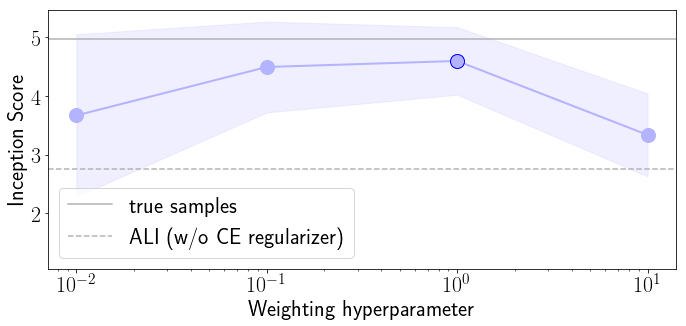

In [121]:
plot_hyperpara_ff(dat_toy_icp,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'toy_icp_weighting', metric='icp', pperf=4.977)

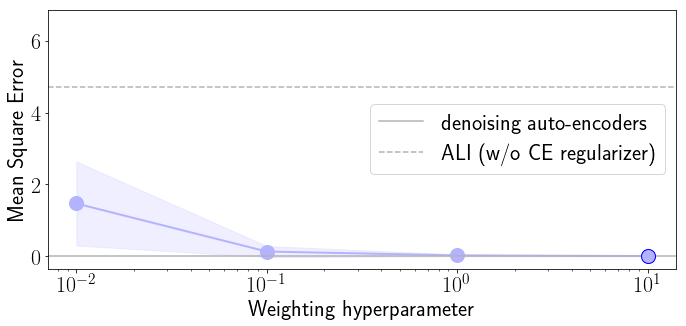

In [122]:
plot_hyperpara_ff(dat_toy_mse,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'toy_mse_weighting', metric='mse', pperf=0.003 )

## MNIST

To specify a weight hyperparameter value (eg. lambda=1.0) for cycle-consistency regularizer, runs like

```
python alice_mnist.py --lambda 1.0
```

In [110]:
dat_MNIST_ALICE_ICP = array([
    [0, 8.749, 0.09],
    [0.00001, 8.851, 0.08],
    [0.0001, 8.869, 0.10],
    [0.001, 8.901, 0.09],
    [0.01, 9.1045, 0.07],
    [0.1, 9.2618, 0.04],
    [1, 9.279, 0.07],
    [10, 8.918, 0.11],
    [100, 8.533, 0.09],
    [1000, 7.776, 0.10],
    [10000, 1.334, 0.01]
])

dat_MNIST_ALICE_MSE = array([
    [0, 0.4803, 0.100],
    [0.00001, 0.5012, 0.039],
    [0.0001, 0.5272, 0.037],
    [0.001, 0.4567, 0.024],
    [0.01, 0.1721, 0.012],
    [0.1, 0.0982, 0.008],
    [1, 0.0803, 0.007],
    [10, 0.0856, 0.006],
    [100, 0.2228, 0.014],
    [1000, 0.2389, 0.026],
    [10000, 0.1107, 0.005]
])

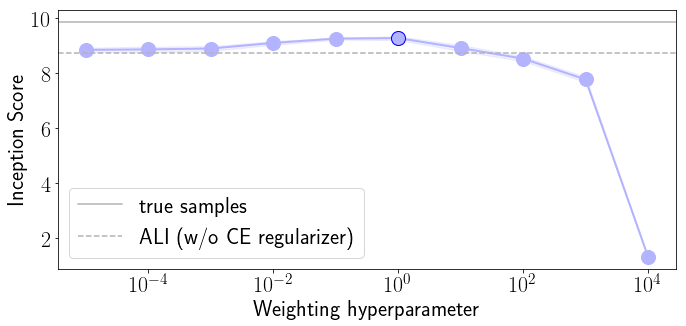

In [116]:
plot_hyperpara_ff(dat_MNIST_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'mnist_icp_weighting', metric='icp', pperf=9.8793)

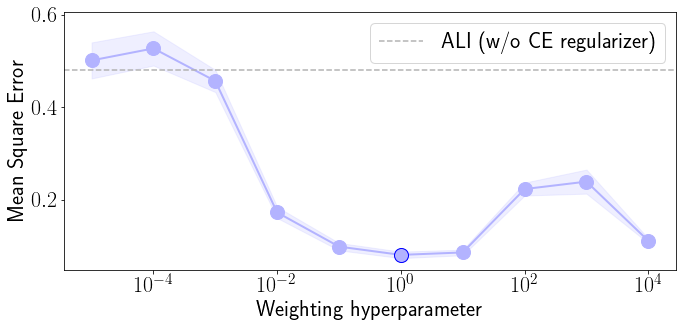

In [117]:
plot_hyperpara_ff(dat_MNIST_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'mnist_mse_weighting', metric='mse')

## CIFAR

In [118]:
dat_CIFAR_ALICE_ICP = array([
    [0, 5.93, 0.0437],
    [1.00E-06, 6.015, 0.0284],
    [1.00E-04, 5.994, 0.0305],
    [1.00E-02, 5.83, 0.0221],
    [1.00E-01, 4.42, 0.0247],
    [5.00E-01, 3.02, 0.0222],
    [1.00E+00, 2.18, 0.0204],
    [1.00E+01, 1.942, 0.0156],
    [5.00E+01, 1.32, 0.0122],
    [1.00E+02, 1.22, .0172],
    [1.00E+03, 1.08, 0.0211]
])

dat_CIFAR_ALICE_MSE = array([
    [0, 0.672, 0.1129],
    [1.00E-06, 0.4155, 0.2015],
    [1.00E-04, 0.2902, 0.1071],
    [1.00E-02, 0.1553, 0.0566],
    [1.00E-01, 0.0991, 0.0349],
    [5.00E-01, 0.0786, 0.0198],
    [1.00E+00, 0.0561, 0.0281],
    [1.00E+01, 0.0321, 0.00198],
    [5.00E+01, 0.0323, 0.003108],
    [1.00E+02, 0.0295, 0.00221],
    [1.00E+03, 0.0217, 0.00176]
])

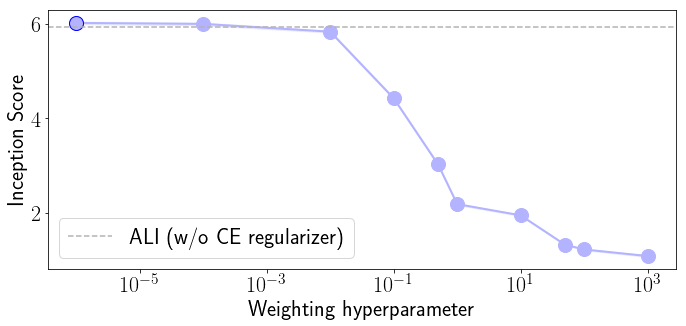

In [119]:
plot_hyperpara_ff(dat_CIFAR_ALICE_ICP,logx=True, ylabel_name="Inception Score" ,saveas=fig_dir+'cifar_icp_weighting', metric='icp')

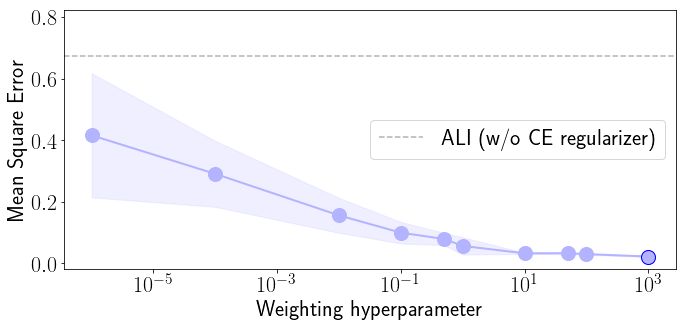

In [120]:
plot_hyperpara_ff(dat_CIFAR_ALICE_MSE,logx=True, ylabel_name="Mean Square Error" ,saveas=fig_dir+'cifar_mse_weighting', metric='mse')